In [87]:
# Data Cleaning
import pandas as pd
from scipy import stats

# Raw

In [88]:
df_1 = pd.read_csv(r'raw\crypto-data\coin_Aave.csv', delimiter=',')
df_2 = pd.read_csv(r'raw\crypto-data\coin_BinanceCoin.csv', delimiter=',')
df_3 = pd.read_csv(r'raw\crypto-data\coin_Bitcoin.csv', delimiter=',')
df_4 = pd.read_csv(r'raw\crypto-data\coin_Cardano.csv', delimiter=',')
df_5 = pd.read_csv(r'raw\crypto-data\coin_ChainLink.csv', delimiter=',')
df_6 = pd.read_csv(r'raw\crypto-data\coin_Cosmos.csv', delimiter=',')
df_7 = pd.read_csv(r'raw\crypto-data\coin_CryptocomCoin.csv', delimiter=',')
df_8 = pd.read_csv(r'raw\crypto-data\coin_Dogecoin.csv', delimiter=',')
df_9 = pd.read_csv(r'raw\crypto-data\coin_EOS.csv', delimiter=',')
df_10 = pd.read_csv(r'raw\crypto-data\coin_Ethereum.csv', delimiter=',')
df_11 = pd.read_csv(r'raw\crypto-data\coin_Iota.csv', delimiter=',')
df_12 = pd.read_csv(r'raw\crypto-data\coin_Litecoin.csv', delimiter=',')
df_13 = pd.read_csv(r'raw\crypto-data\coin_Monero.csv', delimiter=',')
df_14 = pd.read_csv(r'raw\crypto-data\coin_NEM.csv', delimiter=',')
df_15 = pd.read_csv(r'raw\crypto-data\coin_Polkadot.csv', delimiter=',')
df_16 = pd.read_csv(r'raw\crypto-data\coin_Solana.csv', delimiter=',')
df_17 = pd.read_csv(r'raw\crypto-data\coin_Stellar.csv', delimiter=',')
df_18 = pd.read_csv(r'raw\crypto-data\coin_Tether.csv', delimiter=',')
df_19 = pd.read_csv(r'raw\crypto-data\coin_Tron.csv', delimiter=',')
df_20 = pd.read_csv(r'raw\crypto-data\coin_Uniswap.csv', delimiter=',')
df_21 = pd.read_csv(r'raw\crypto-data\coin_USDCoin.csv', delimiter=',')
df_22 = pd.read_csv(r'raw\crypto-data\coin_WrappedBitcoin.csv', delimiter=',')
df_23 = pd.read_csv(r'raw\crypto-data\coin_XRP.csv', delimiter=',')

In [89]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5
               ,df_6, df_7, df_8, df_9, df_10
               ,df_11, df_12, df_13, df_14, df_15
               ,df_16, df_17, df_18, df_19, df_20
               ,df_21, df_22, df_23]
               ,ignore_index=True)

In [90]:
# Drop Columns
df = df.drop(columns=['SNo','High','Low','Open'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       37082 non-null  object 
 1   Symbol     37082 non-null  object 
 2   Date       37082 non-null  object 
 3   Close      37082 non-null  float64
 4   Volume     37082 non-null  float64
 5   Marketcap  37082 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.7+ MB


Format Date

In [92]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [93]:
df.head(8)

,Name,Symbol,Date,Close,Volume,Marketcap
0,Aave,AAVE,2020-10-05,53.219243,0.000000e+00,8.912813e+07
1,Aave,AAVE,2020-10-06,42.401599,5.830915e+05,7.101144e+07
2,Aave,AAVE,2020-10-07,40.083976,6.828342e+05,6.713004e+07
3,Aave,AAVE,2020-10-08,43.764463,1.658817e+06,2.202651e+08
4,Aave,AAVE,2020-10-09,46.817744,8.155377e+05,2.356322e+08
5,Aave,AAVE,2020-10-10,49.133718,1.074627e+06,2.472884e+08
6,Aave,AAVE,2020-10-11,49.660726,6.921506e+05,2.499408e+08
7,Aave,AAVE,2020-10-12,52.238692,1.354836e+06,2.629157e+08


Rename Column

In [94]:
df.rename(columns={
    'Name':'Crypto'
    ,'Symbol':'Label'
    ,'Close':'Closing_Price'}
    ,inplace=True)

Zero Volume

In [95]:
df = df.where(~(df['Volume']==0)).dropna()

Zero Marketcap

In [96]:
df = df.where(~(df['Marketcap']==0)).dropna()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36111 entries, 1 to 37081
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Crypto         36111 non-null  object 
 1   Label          36111 non-null  object 
 2   Date           36111 non-null  object 
 3   Closing_Price  36111 non-null  float64
 4   Volume         36111 non-null  float64
 5   Marketcap      36111 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.9+ MB


# Pre-Clean

Checkpoint:

In [98]:
df.to_csv('pre-crypto.csv'
          ,index=False)

In [99]:
df_pre = pd.read_csv('pre-crypto.csv'
                     ,delimiter=',')
df = df_pre.copy()

# Outliers

In [100]:
z_marketcap = stats.zscore(df['Marketcap'])
outliers_mc = (z_marketcap>3)|(z_marketcap<-3)

In [101]:
df = df[~outliers_mc]

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35722 entries, 0 to 36110
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Crypto         35722 non-null  object 
 1   Label          35722 non-null  object 
 2   Date           35722 non-null  object 
 3   Closing_Price  35722 non-null  float64
 4   Volume         35722 non-null  float64
 5   Marketcap      35722 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.9+ MB


<Axes: title={'center': 'Marketcap'}>

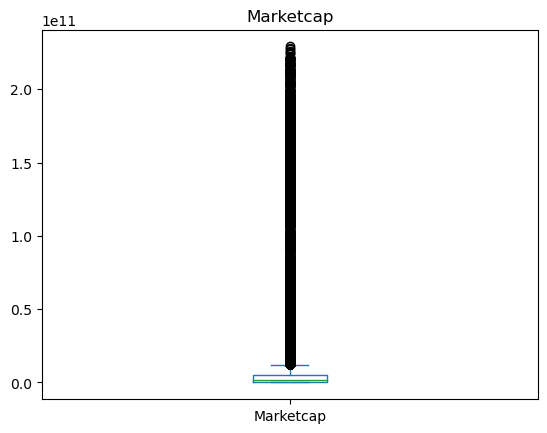

In [104]:
df['Marketcap'].plot(kind='box',title='Marketcap')

# Clean

In [105]:
df.to_csv('clean-crypto.csv'
          ,index=False)